In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.metrics import auc

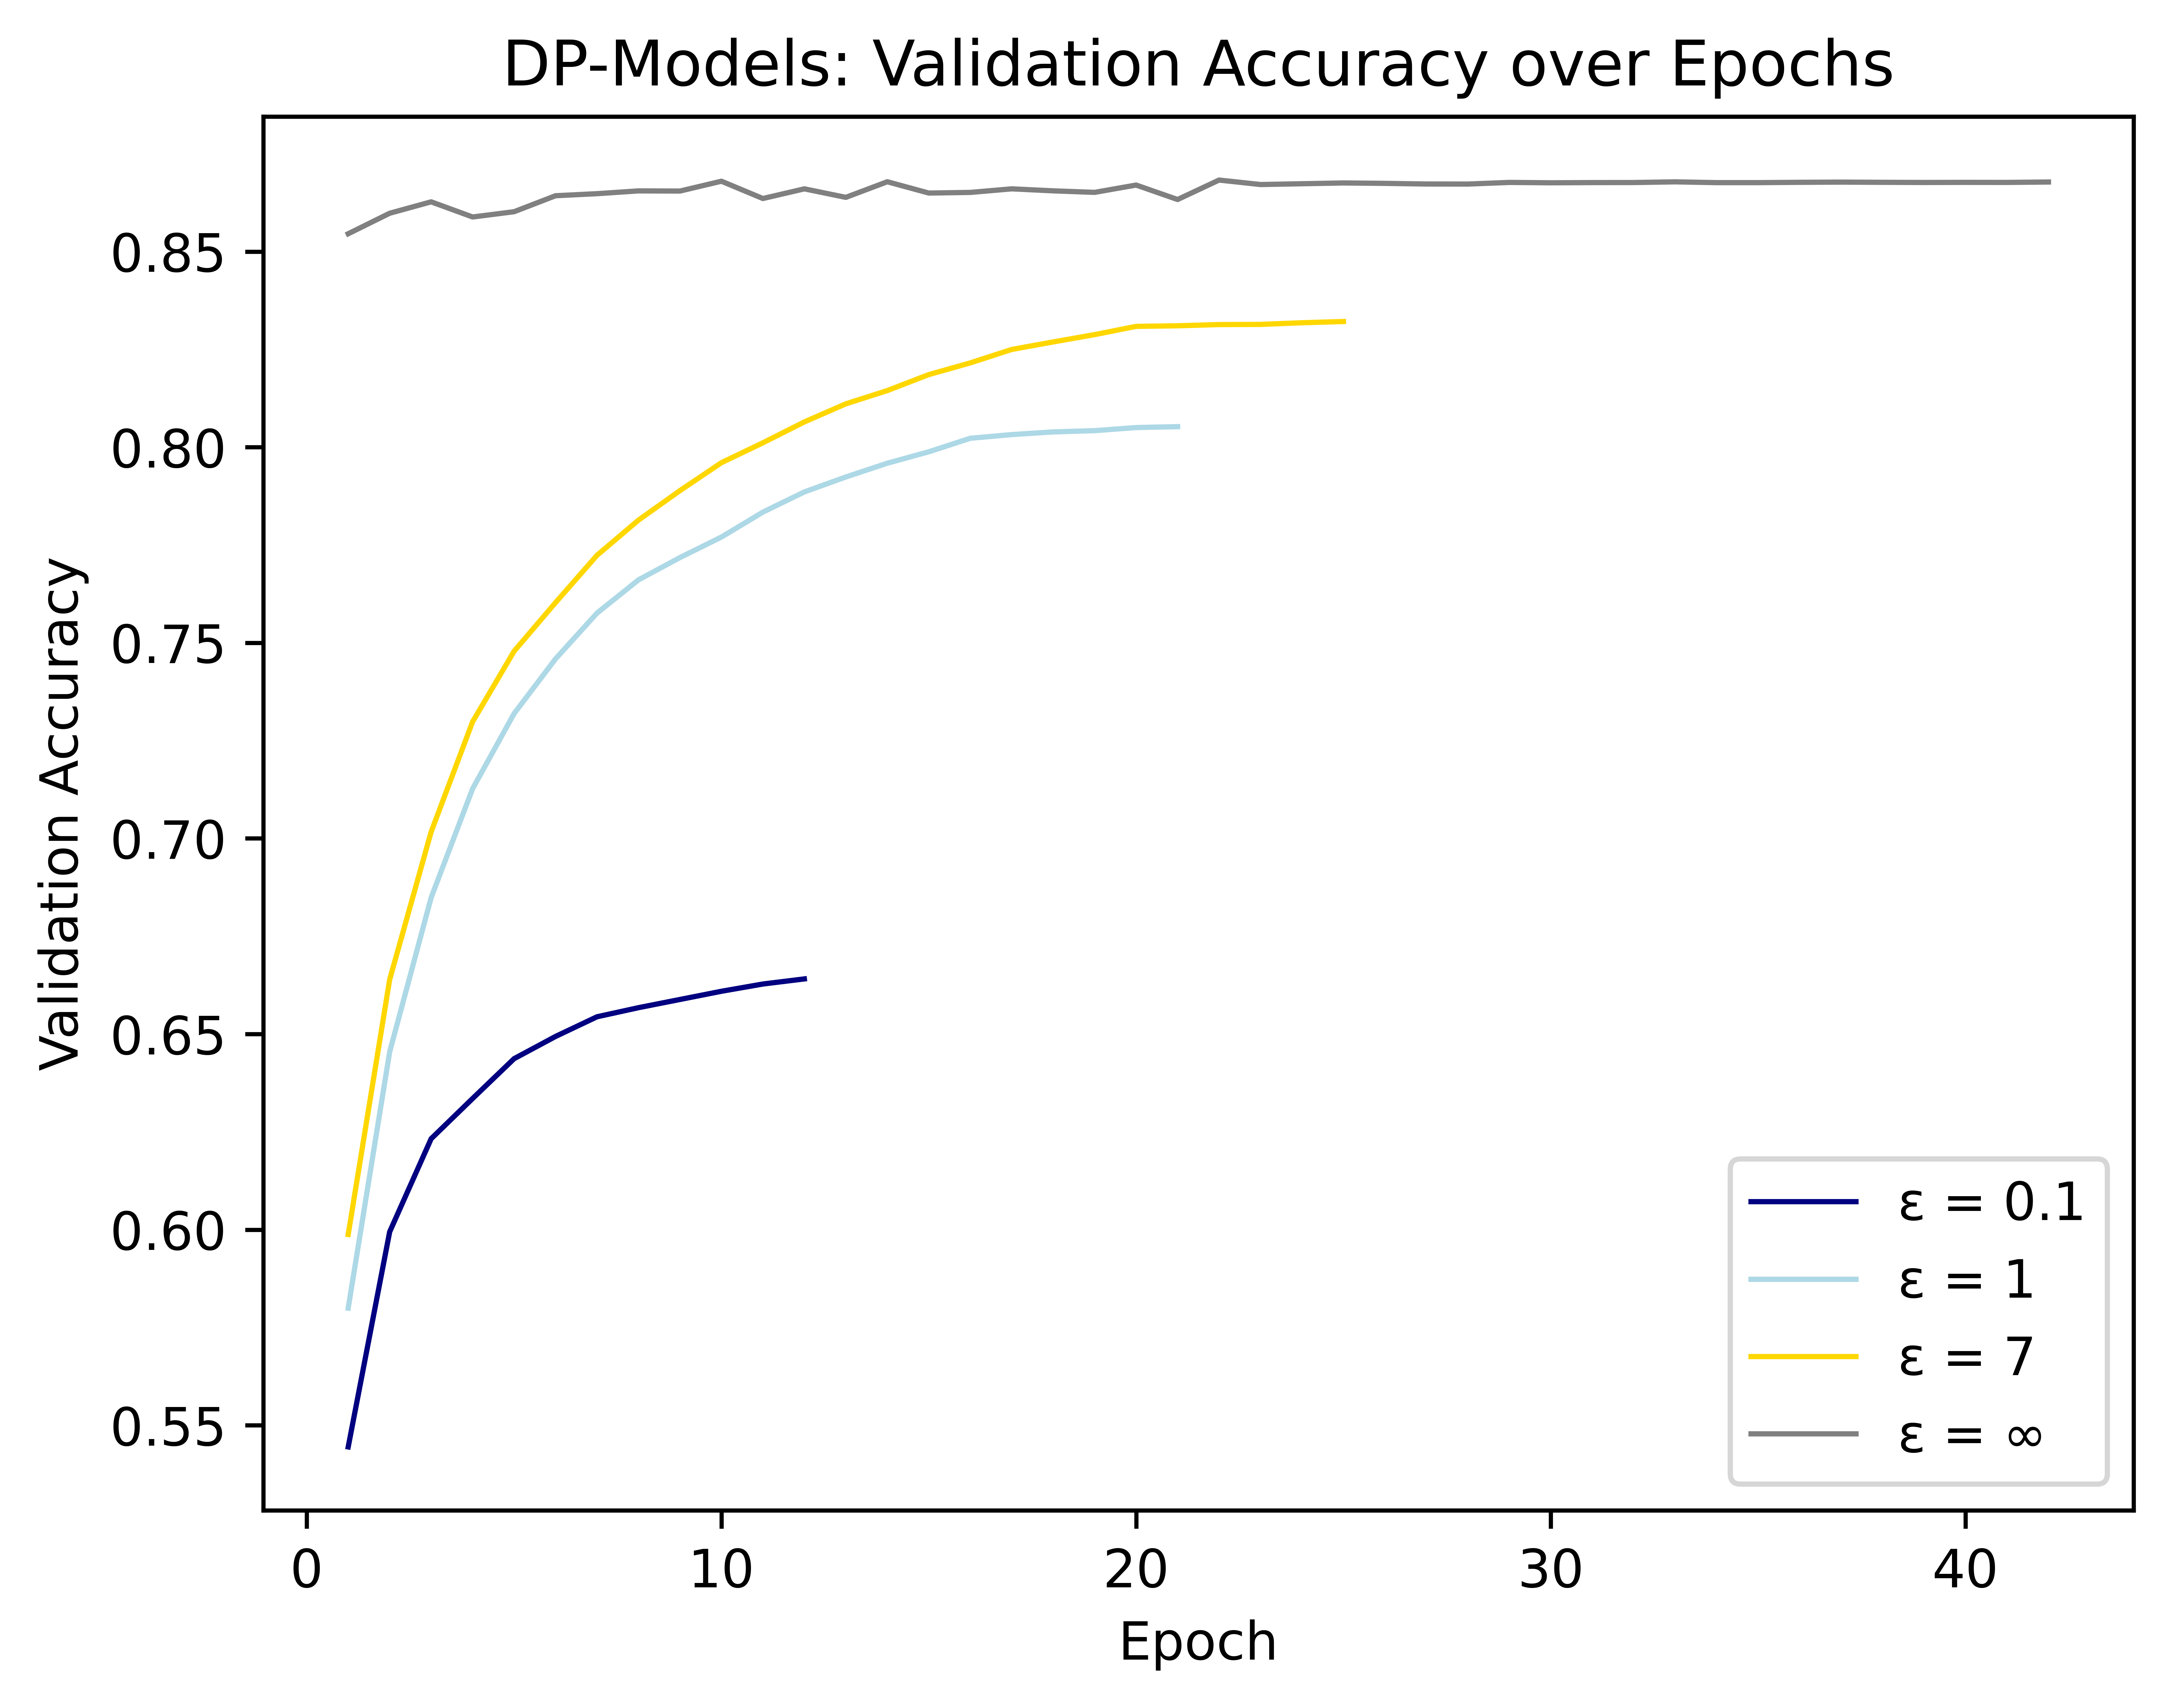

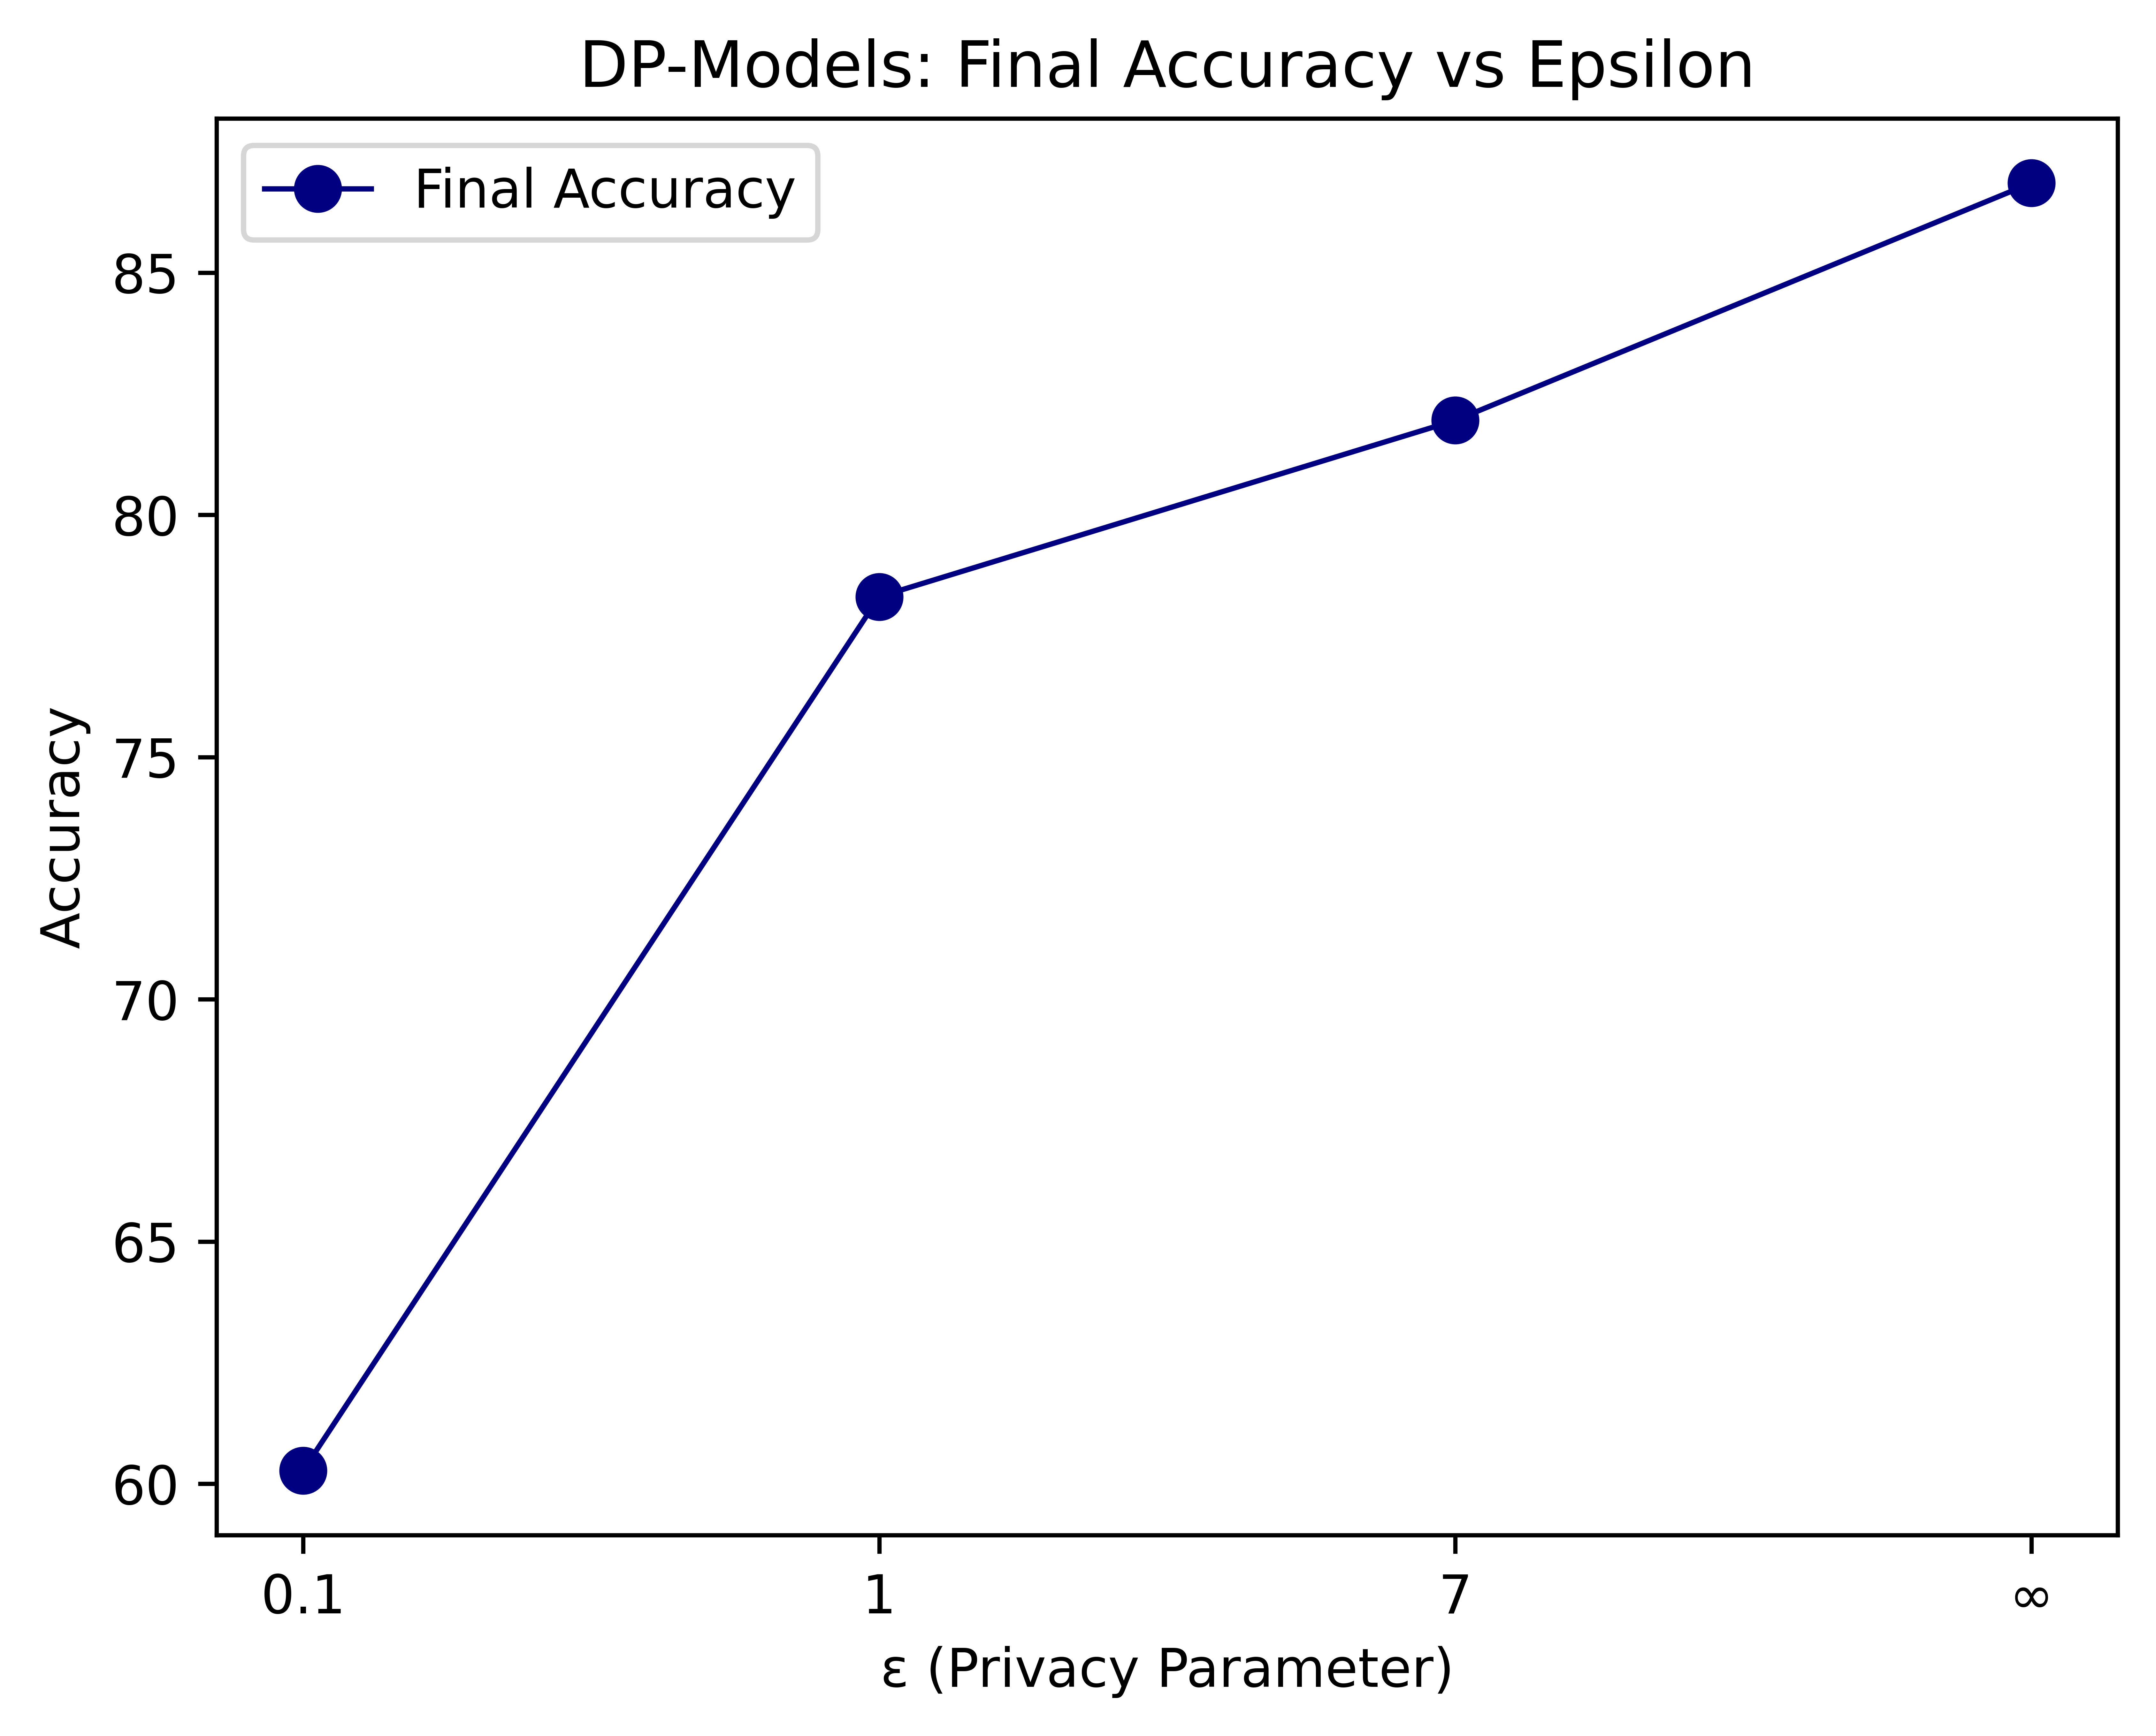

In [ ]:
def plot_dp_model_accuracies(hist_eps_01_path, hist_eps_1_path, hist_eps_7_path, hist_eps_baseline_path, final_accuracies):
    # Load the model histories from CSV files
    hist_eps_01 = pd.read_csv(hist_eps_01_path)
    hist_eps_1 = pd.read_csv(hist_eps_1_path)
    hist_eps_7 = pd.read_csv(hist_eps_7_path)
    hist_eps_baseline = pd.read_csv(hist_eps_baseline_path)

    # Plot Validation Accuracy over Epochs
    plt.figure(dpi=1200)

    plt.plot(range(1, len(hist_eps_01.val_accuracy)+1),
             hist_eps_01.val_accuracy, color="navy", linewidth="1", label="ε = 0.1")
    plt.plot(range(1, len(hist_eps_1.val_accuracy)+1),
             hist_eps_1.val_accuracy, color="lightblue", linewidth="1", label="ε = 1")
    plt.plot(range(1, len(hist_eps_7.val_accuracy)+1),
             hist_eps_7.val_accuracy, color="gold", linewidth="1", label="ε = 7")
    plt.plot(range(1, len(hist_eps_baseline.val_accuracy)+1),
             hist_eps_baseline.val_accuracy, color="grey", linewidth="1", label="ε = ∞")

    plt.title('DP-Models: Validation Accuracy over Epochs')
    plt.legend()
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')

    plt.show()

    # Plot Final Accuracy for Different Epsilon Values
    plt.figure(dpi=1200)

    eps_values = ['0.1', '1', '7', '∞']
    plt.plot(eps_values, final_accuracies, color="navy", marker='o', linestyle='-', linewidth=1, markersize=8, label='Final Accuracy')

    plt.title('DP-Models: Final Accuracy vs Epsilon')
    plt.ylabel('Accuracy')
    plt.xlabel('ε (Privacy Parameter)')  # Use ε to represent privacy parameter
    plt.legend()  # Add the legend for the final accuracy plot
    plt.show()


# Example usage of the function:
final_accuracies = [60.27, 78.31, 81.95, 86.85]
plot_dp_model_accuracies(
    "/content/drive/MyDrive/models/histories/dp_models/accuracy/LR_dp-sgd_eps-0.1.csv",
    "/content/drive/MyDrive/models/histories/dp_models/accuracy/LR_dp-sgd_eps-1.csv",
    "/content/drive/MyDrive/models/histories/dp_models/accuracy/LR_dp-sgd_eps-7.csv",
    "/content/drive/MyDrive/models/histories/baseline_models/accuracy/baseline_lr.csv",
    final_accuracies
)

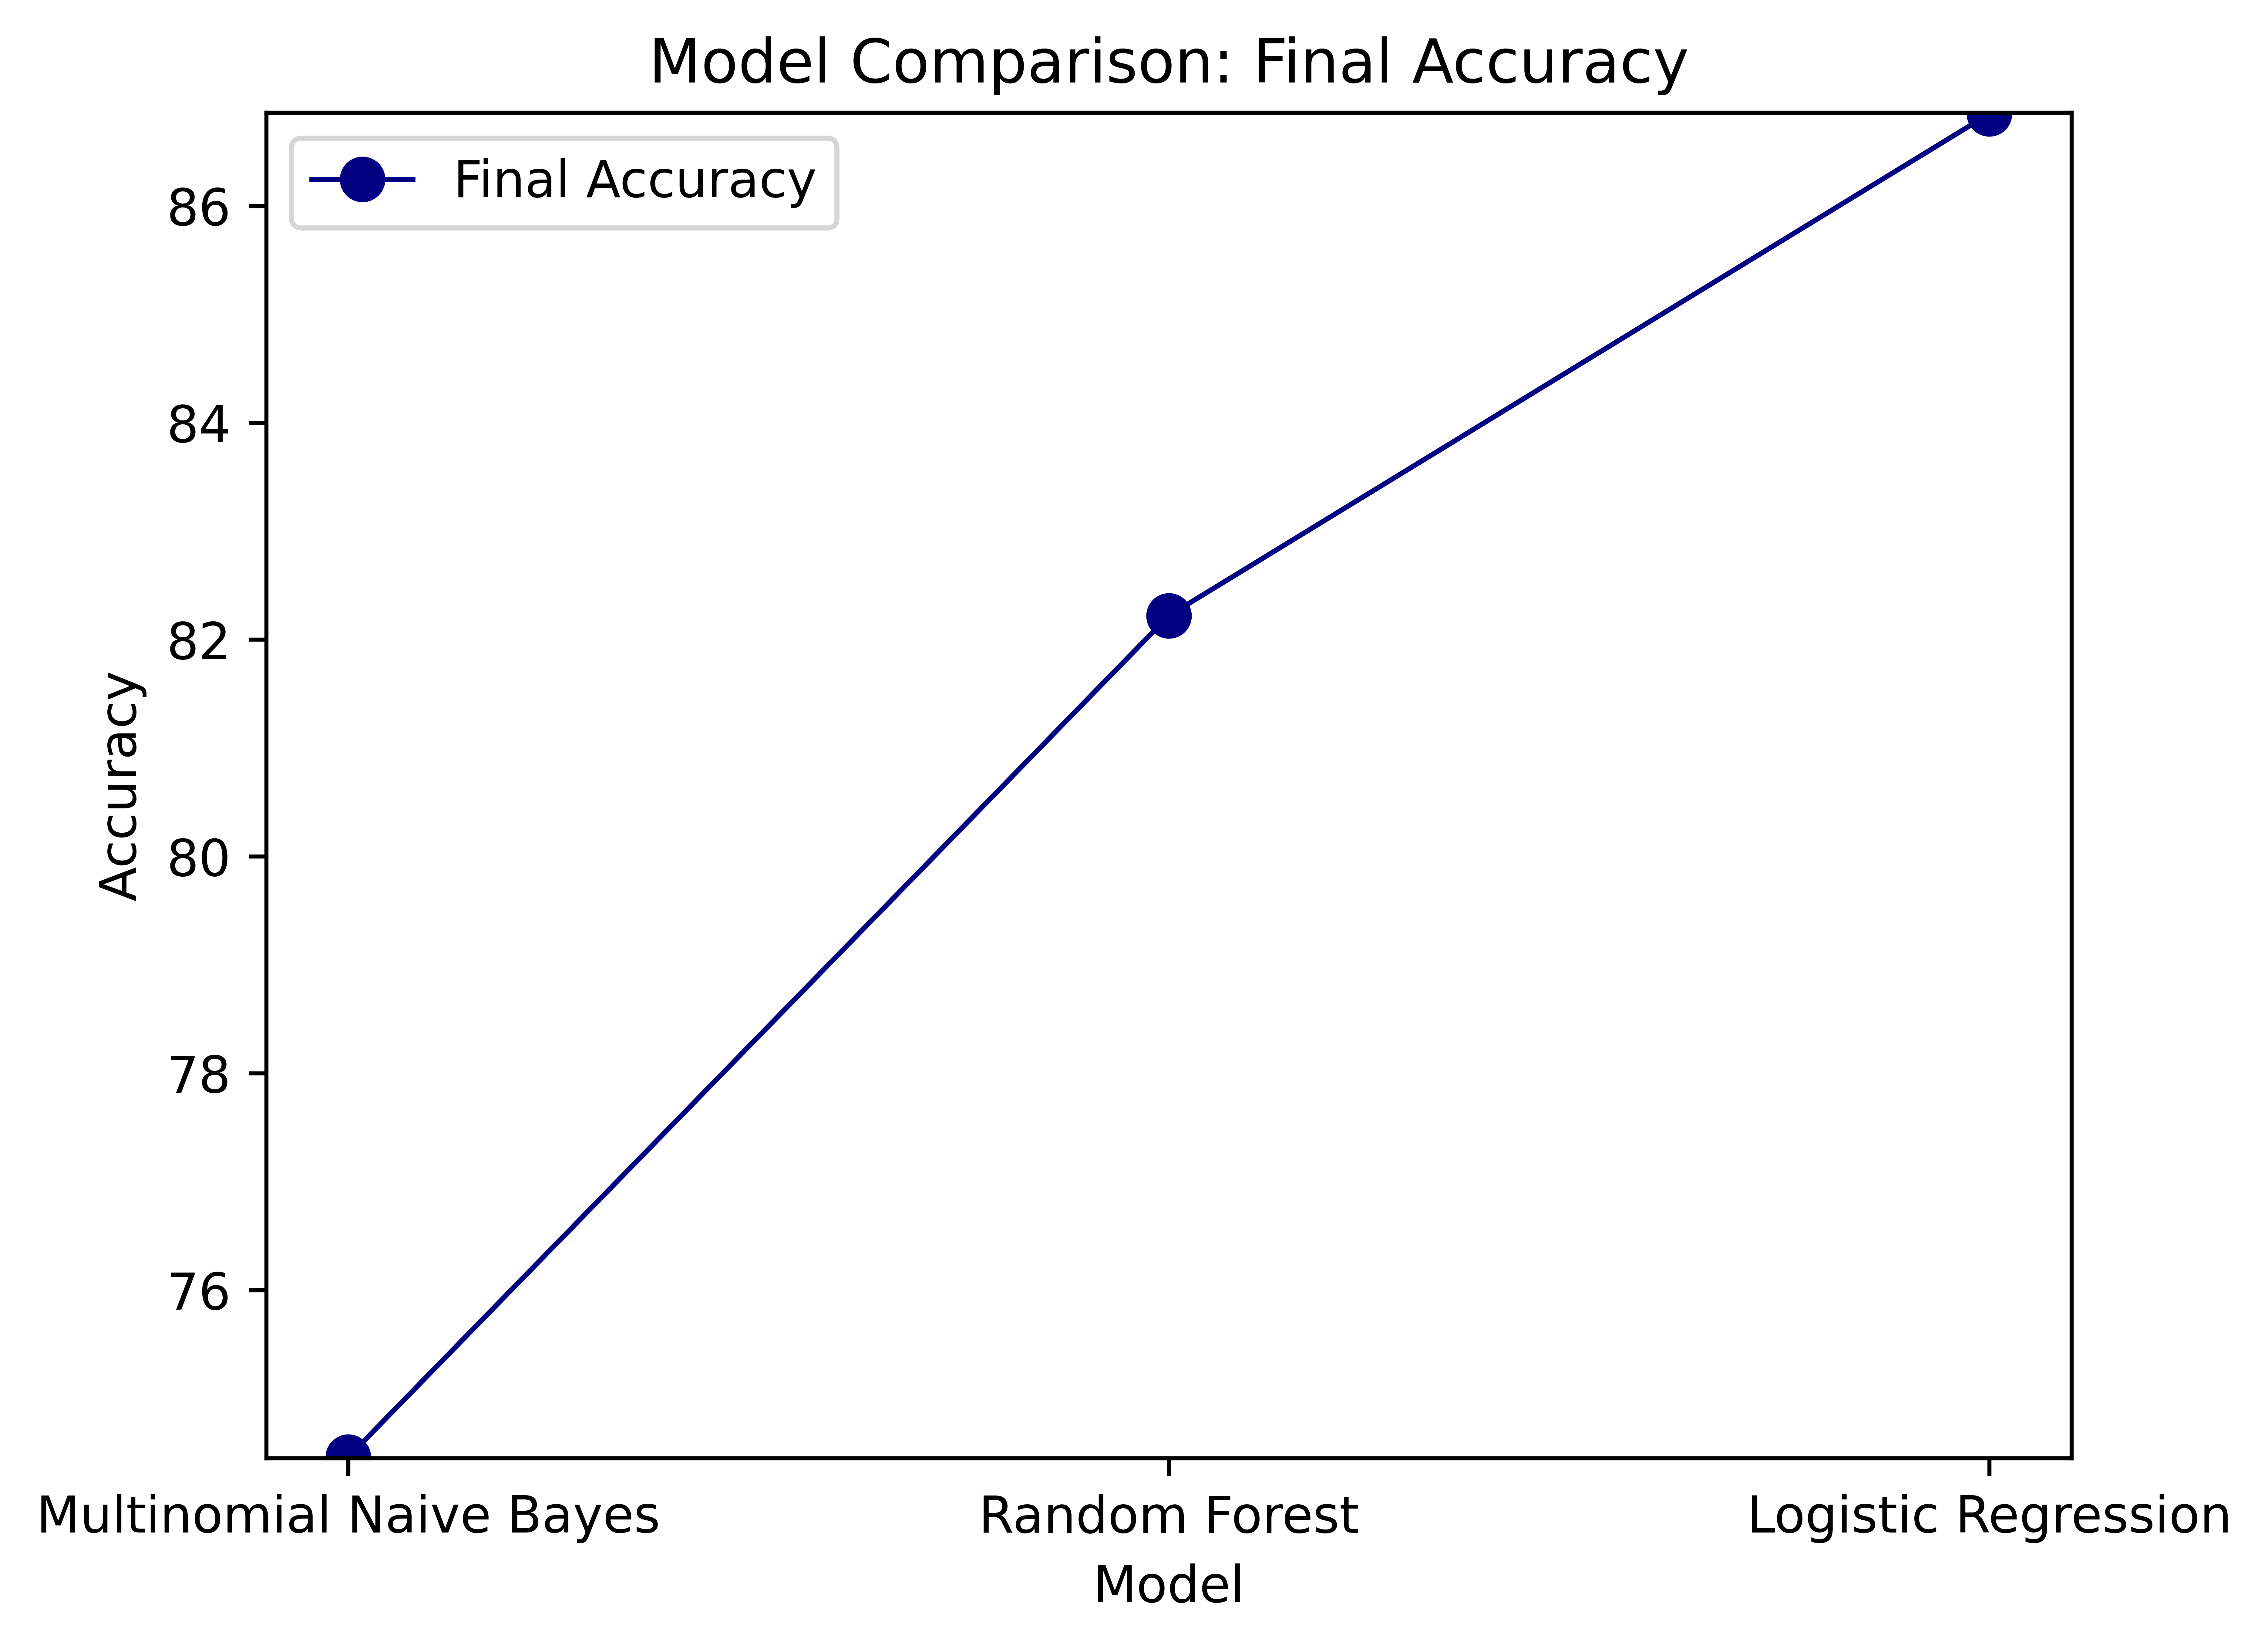

In [ ]:
def plot_final_accuracies(nb_path, rf_path, baseline_lr_path, final_accuracies):
    # Load the model histories from CSV files (though they might not be used for plotting final accuracy)
    hist_nb = pd.read_csv(nb_path)          # Naive Bayes
    hist_rf = pd.read_csv(rf_path)          # Random Forest
    hist_baseline = pd.read_csv(baseline_lr_path)  # Baseline (Logistic Regression)


    # Plot Final Accuracy for Different Models as a Line Chart
    plt.figure(dpi=1200)

    model_names = ['Multinomial Naive Bayes', 'Random Forest', "Logistic Regression"]
    plt.plot(model_names, final_accuracies, color="navy", marker='o', linestyle='-', linewidth=1, markersize=8, label='Final Accuracy')

    plt.title('Model Comparison: Final Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')

    # Dynamically set y-axis limits
    y_min = min(final_accuracies) - 0.01
    y_max = max(final_accuracies) + 0.01
    plt.ylim(y_min, y_max)  # Set y-axis limits to fit the data

    plt.legend()
    plt.show()

# Example usage of the function:
final_accuracies = [74.46, 82.22, 86.85]  # Replace with actual accuracies
plot_final_accuracies(
    "/content/drive/MyDrive/models/histories/baseline_models/metrics/Multinomial Naive Bayes_metrics.csv",        # Naive Bayes history
    "/content/drive/MyDrive/models/histories/baseline_models/metrics/Random Forest Classifier_metrics.csv",        # Random Forest history
    "/content/drive/MyDrive/models/histories/baseline_models/accuracy/baseline_lr.csv",        # Logistic Regression history
    final_accuracies                                                # Pass the final_accuracies list
)

In [ ]:
def plot_multiple_roc_curves(roc_paths, labels, colors=None):
    plt.figure(dpi=1200, figsize=(10, 8))

    # Default colors if not provided
    if colors is None:
        colors = ["navy", "lightblue", "gold", "black"]

    for i, path in enumerate(roc_paths):
        # Load ROC data from CSV
        roc_data = pd.read_csv(path)
        fpr = roc_data['fpr']  # Use the actual column names
        tpr = roc_data['tpr']

        # Calculate AUC
        roc_auc = auc(fpr, tpr)

        # Plot each ROC curve
        plt.plot(fpr, tpr, color=colors[i % len(colors)], linewidth=1.5,
                 label=f'{labels[i]} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line for a random classifier
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparison of ROC Curves(BASELINE TRADITIONAL MODELS)')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
roc_paths = [
    "/content/drive/MyDrive/models/histories/baseline_models/roc_curve/baseline_lr",
    "/content/drive/MyDrive/models/histories/baseline_models/metrics/Multinomial Naive Bayes_roc_curve.csv",
    "/content/drive/MyDrive/models/histories/baseline_models/metrics/Random Forest Classifier_roc_curve.csv"
]
labels = ["MLR", "MNB", "RF"]

plot_multiple_roc_curves(roc_paths, labels)

In [ ]:
def plot_multiple_roc_curves(roc_paths, labels, colors=None):
    plt.figure(dpi=1200, figsize=(10, 8))

    # Default colors if not provided
    if colors is None:
        colors = ["grey", "navy", "lightblue", "gold", "black"]

    for i, path in enumerate(roc_paths):
        # Load ROC data from CSV
        roc_data = pd.read_csv(path)
        fpr = roc_data['fpr']  # Use the actual column names
        tpr = roc_data['tpr']

        # Calculate AUC
        roc_auc = auc(fpr, tpr)

        # Plot each ROC curve
        plt.plot(fpr, tpr, color=colors[i % len(colors)], linewidth=1.5,
                 label=f'{labels[i]} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line for a random classifier
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparison of ROC Curves(DP-SGD MODELS vs. TRADITIONAL MODELS )')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
roc_paths = [
    "/content/drive/MyDrive/models/histories/dp_models/roc_curve/LR_dp-sgd_eps-0.1",
    "/content/drive/MyDrive/models/histories/dp_models/roc_curve/LR_dp-sgd_eps-7",
    "/content/drive/MyDrive/models/histories/dp_models/roc_curve/LR_dp-sgd_eps-1",
    "/content/drive/MyDrive/models/histories/dp_models/roc_curve/LR_dp-sgd_eps-0.1"

]
labels = ["∞", "7", "1", "0.1"]

plot_multiple_roc_curves(roc_paths, labels)

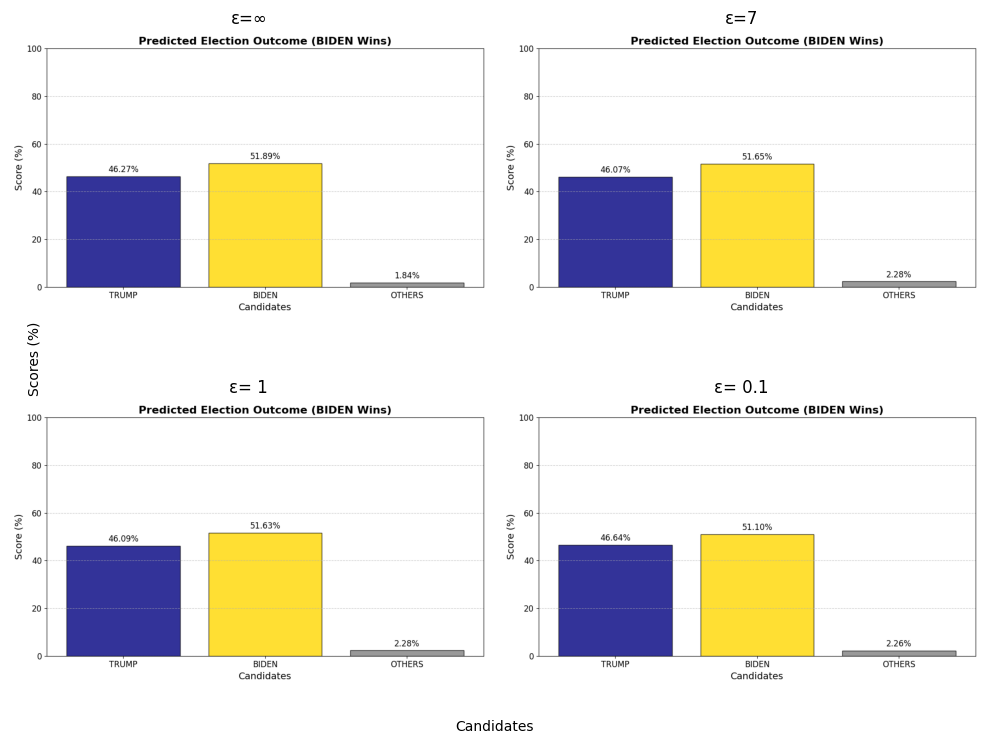

In [ ]:
# Create a 2x2 grid for the images
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Load each image (replace 'image_path' with your actual image file paths)
img_a = mpimg.imread('/content/download (100).png')  # Path to Graph A image
img_b = mpimg.imread('/content/download - 2024-12-14T162645.105.png')  # Path to Graph B image
img_c = mpimg.imread('/content/download - 2024-12-14T162834.530.png')  # Path to Graph C image
img_d = mpimg.imread('/content/download (99).png')  # Path to Graph D image

# Place each image on a subplot
axes[0, 0].imshow(img_a)
axes[0, 0].set_title('ε=∞')
axes[0, 0].axis('off')  # Turn off axis

axes[0, 1].imshow(img_b)
axes[0, 1].set_title('ε=7')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_c)
axes[1, 0].set_title('ε= 1')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_d)
axes[1, 1].set_title('ε= 0.1')
axes[1, 1].axis('off')

# Add x and y axis labels for the entire figure (overall labels)
fig.text(0.5, 0.04, 'Candidates', ha='center', va='center')  # X-axis label
fig.text(0.04, 0.5, 'Scores (%)', ha='center', va='center', rotation='vertical')  # Y-axis label

# Adjust layout to prevent overlapping
plt.tight_layout()


plt.show()  # Display the combined image in Cola